In [1]:
#pip install mlxtend

In [1]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
#Loading the dataset
data_fp = pd.read_csv('Faceplate.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
data_fp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Red,White,Blue,Orange,Green,Yellow
0,1,1,1,0,0,1,0
1,2,0,1,0,1,0,0
2,3,0,1,1,0,0,0
3,4,1,1,0,1,0,0
4,5,1,0,1,0,0,0
5,6,0,1,1,0,0,0
6,7,1,0,1,0,0,0
7,8,1,1,1,0,1,0
8,9,1,1,1,0,0,0
9,10,0,0,0,0,0,1


In [6]:
#Basic preprocessing steps to understand the data
data_fp.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10, 7)

In [7]:
data_fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Transaction  10 non-null     int64
 1   Red          10 non-null     int64
 2   White        10 non-null     int64
 3   Blue         10 non-null     int64
 4   Orange       10 non-null     int64
 5   Green        10 non-null     int64
 6   Yellow       10 non-null     int64
dtypes: int64(7)
memory usage: 688.0 bytes


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
data_fp.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Red,White,Blue,Orange,Green,Yellow
0,1,1,1,0,0,1,0
1,2,0,1,0,1,0,0
2,3,0,1,1,0,0,0
3,4,1,1,0,1,0,0
4,5,1,0,1,0,0,0


#1) Faceplate.csv, a) Find the frequent itemsets with min_support =0.2. (use confidence as metric).

In [4]:
data_fp_encoded = pd.get_dummies(data_fp.iloc[:,1:], dummy_na=False)
min_sup = 0.2
frequent_itemsets = apriori(data_fp_encoded, min_support=min_sup, use_colnames=True)
print("Frequent Itemsets with min_support = 0.2:\n", frequent_itemsets)

Frequent Itemsets with min_support = 0.2:
     support             itemsets
0       0.6                (Red)
1       0.7              (White)
2       0.6               (Blue)
3       0.2             (Orange)
4       0.2              (Green)
5       0.4         (White, Red)
6       0.4          (Blue, Red)
7       0.2         (Red, Green)
8       0.4        (White, Blue)
9       0.2      (White, Orange)
10      0.2       (White, Green)
11      0.2   (White, Blue, Red)
12      0.2  (White, Red, Green)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#b) Find the association rules and print support, confidence, and lift (interest factor) for each of the found association rules.( min_confidence= 0.5). After finding the rules with min_confidence, print their support, confidence and interest factor.

# we can print all the rules directly as below.

In [5]:
rules_association = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
print("All the assoication Rules:")
print(rules_association[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

All the assoication Rules:
       antecedents   consequents  support  confidence      lift
0          (White)         (Red)      0.4    0.571429  0.952381
1            (Red)       (White)      0.4    0.666667  0.952381
2           (Blue)         (Red)      0.4    0.666667  1.111111
3            (Red)        (Blue)      0.4    0.666667  1.111111
4          (Green)         (Red)      0.2    1.000000  1.666667
5          (White)        (Blue)      0.4    0.571429  0.952381
6           (Blue)       (White)      0.4    0.666667  0.952381
7         (Orange)       (White)      0.2    1.000000  1.428571
8          (Green)       (White)      0.2    1.000000  1.428571
9    (White, Blue)         (Red)      0.2    0.500000  0.833333
10    (White, Red)        (Blue)      0.2    0.500000  0.833333
11     (Blue, Red)       (White)      0.2    0.500000  0.714286
12    (White, Red)       (Green)      0.2    0.500000  2.500000
13  (White, Green)         (Red)      0.2    1.000000  1.666667
14    (Red, G

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# (or) we can also print Association Rules with min_confidence >= 0.5

In [36]:
min_conf = 0.5
association_rules_conf = association_rules(frequent_itemsets, metric="confidence")

assoc_rules_min_conf = association_rules_conf[association_rules_conf['confidence'] >= min_conf]
print("\nAssociation Rules with min_confidence >= 0.5:\n", assoc_rules_min_conf[['support', 'confidence', 'lift']])


Association Rules with min_confidence >= 0.5:
    support  confidence      lift
0      0.2         1.0  1.666667
1      0.2         1.0  1.428571
2      0.2         1.0  1.428571
3      0.2         1.0  1.666667
4      0.2         1.0  1.428571
5      0.2         1.0  2.500000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# Printing the support, confidence, and lift for each of the found association rules
for index, row in assoc_rules_min_conf.iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']

    print(f"Rule: {antecedents} -> {consequents}")
    print(f"Support: {support:.3f}")
    print(f"Confidence: {confidence:.3f}")
    print(f"Lift (Interest Factor): {lift:.3f}")
    print()

Rule: Green -> Red
Support: 0.200
Confidence: 1.000
Lift (Interest Factor): 1.667

Rule: Orange -> White
Support: 0.200
Confidence: 1.000
Lift (Interest Factor): 1.429

Rule: Green -> White
Support: 0.200
Confidence: 1.000
Lift (Interest Factor): 1.429

Rule: White, Green -> Red
Support: 0.200
Confidence: 1.000
Lift (Interest Factor): 1.667

Rule: Green, Red -> White
Support: 0.200
Confidence: 1.000
Lift (Interest Factor): 1.429

Rule: Green -> White, Red
Support: 0.200
Confidence: 1.000
Lift (Interest Factor): 2.500



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#c) filter the rules and print rules with only single consequents.

In [32]:
#Answer C
single_consequent_rules = rules_association[rules_association['consequents'].apply(lambda x: len(x) == 1)]
single_consequent_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,(White),(Red),0.4,0.571429,0.952381
1,(Red),(White),0.4,0.666667,0.952381
2,(Blue),(Red),0.4,0.666667,1.111111
3,(Red),(Blue),0.4,0.666667,1.111111
4,(Green),(Red),0.2,1.000000,1.666667
5,(White),(Blue),0.4,0.571429,0.952381
6,(Blue),(White),0.4,0.666667,0.952381
7,(Orange),(White),0.2,1.000000,1.428571
8,(Green),(White),0.2,1.000000,1.428571
9,"(White, Blue)",(Red),0.2,0.500000,0.833333


# Similarly we can also print Association Rules with Single Consequent with min_confidence >= 0.5.

In [33]:
# Answer c)
min_conf = 0.5
association_rules_all = association_rules(frequent_itemsets, metric="confidence")

assoc_rules_min_conf_single = association_rules_all[
    (association_rules_all['confidence'] >= min_conf) &
    (association_rules_all['consequents'].apply(lambda x: len(x) == 1))
]
assoc_rules_min_conf_single

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Green),(Red),0.2,0.6,0.2,1.0,1.666667,0.08,inf,0.500
1,(Orange),(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf,0.375
2,(Green),(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf,0.375
3,"(White, Green)",(Red),0.2,0.6,0.2,1.0,1.666667,0.08,inf,0.500
4,"(Red, Green)",(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf,0.375


**2) Charles Book Club:
This dataset examines associations among transactions involving various types of books.
The database includes 2000 transactions, and there are 11 different types of books.**

#a) Drop the following columns 'Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'Related Purchase', 'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence'Plot the support count for each item in the dataset using barplot.
After dropping the mentioned columns you need to assign 1 for values greater than 1 before using apriori. Plot the support count for each item in the dataset using barplot: after adjusting the value for cell greater than 1, for each column, get the frequency by dividing the sum of the values in the column by the number of rows in the dataset and plot a histogram.so: frequency = df.sum(axis=0)/len(df)

In [3]:
dfc = pd.read_csv('CharlesBookClub.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
dfc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297,14,2,22,0,1,1,...,0,0,0,0,0,5,4,2,0,1
1,2,29,0,128,8,2,10,0,0,0,...,0,0,0,0,0,4,3,2,0,1
2,3,46,1,138,22,7,56,2,1,2,...,1,0,0,0,2,4,4,3,0,1
3,4,47,1,228,2,1,2,0,0,0,...,0,0,0,0,0,5,1,1,0,1
4,5,51,1,257,10,1,10,0,0,0,...,0,0,0,0,0,5,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,32950,0,141,2,2,6,0,0,0,...,0,0,0,0,0,4,1,2,0,1
3996,3997,32954,1,357,16,9,52,1,1,2,...,0,0,0,0,1,5,4,3,0,1
3997,3998,32955,0,48,12,1,12,0,0,0,...,0,0,0,0,0,2,3,1,0,1
3998,3999,32976,0,214,14,7,38,1,1,3,...,0,0,0,0,0,5,4,3,0,1


In [17]:
#dfc = dfc.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
data_drop = dfc.drop(columns = ['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'Related Purchase', 'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence'])
data_drop

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2,0,1,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,0
3996,1,1,2,2,2,0,1,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,0
3998,1,1,3,1,0,0,0,0,0,0,0


##After excluding the specified columns, set values to 1 for occurrences greater than 1 before applying the Apriori algorithm.

In [5]:
data_drop = data_drop.applymap(lambda x: 1 if x > 1 else x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


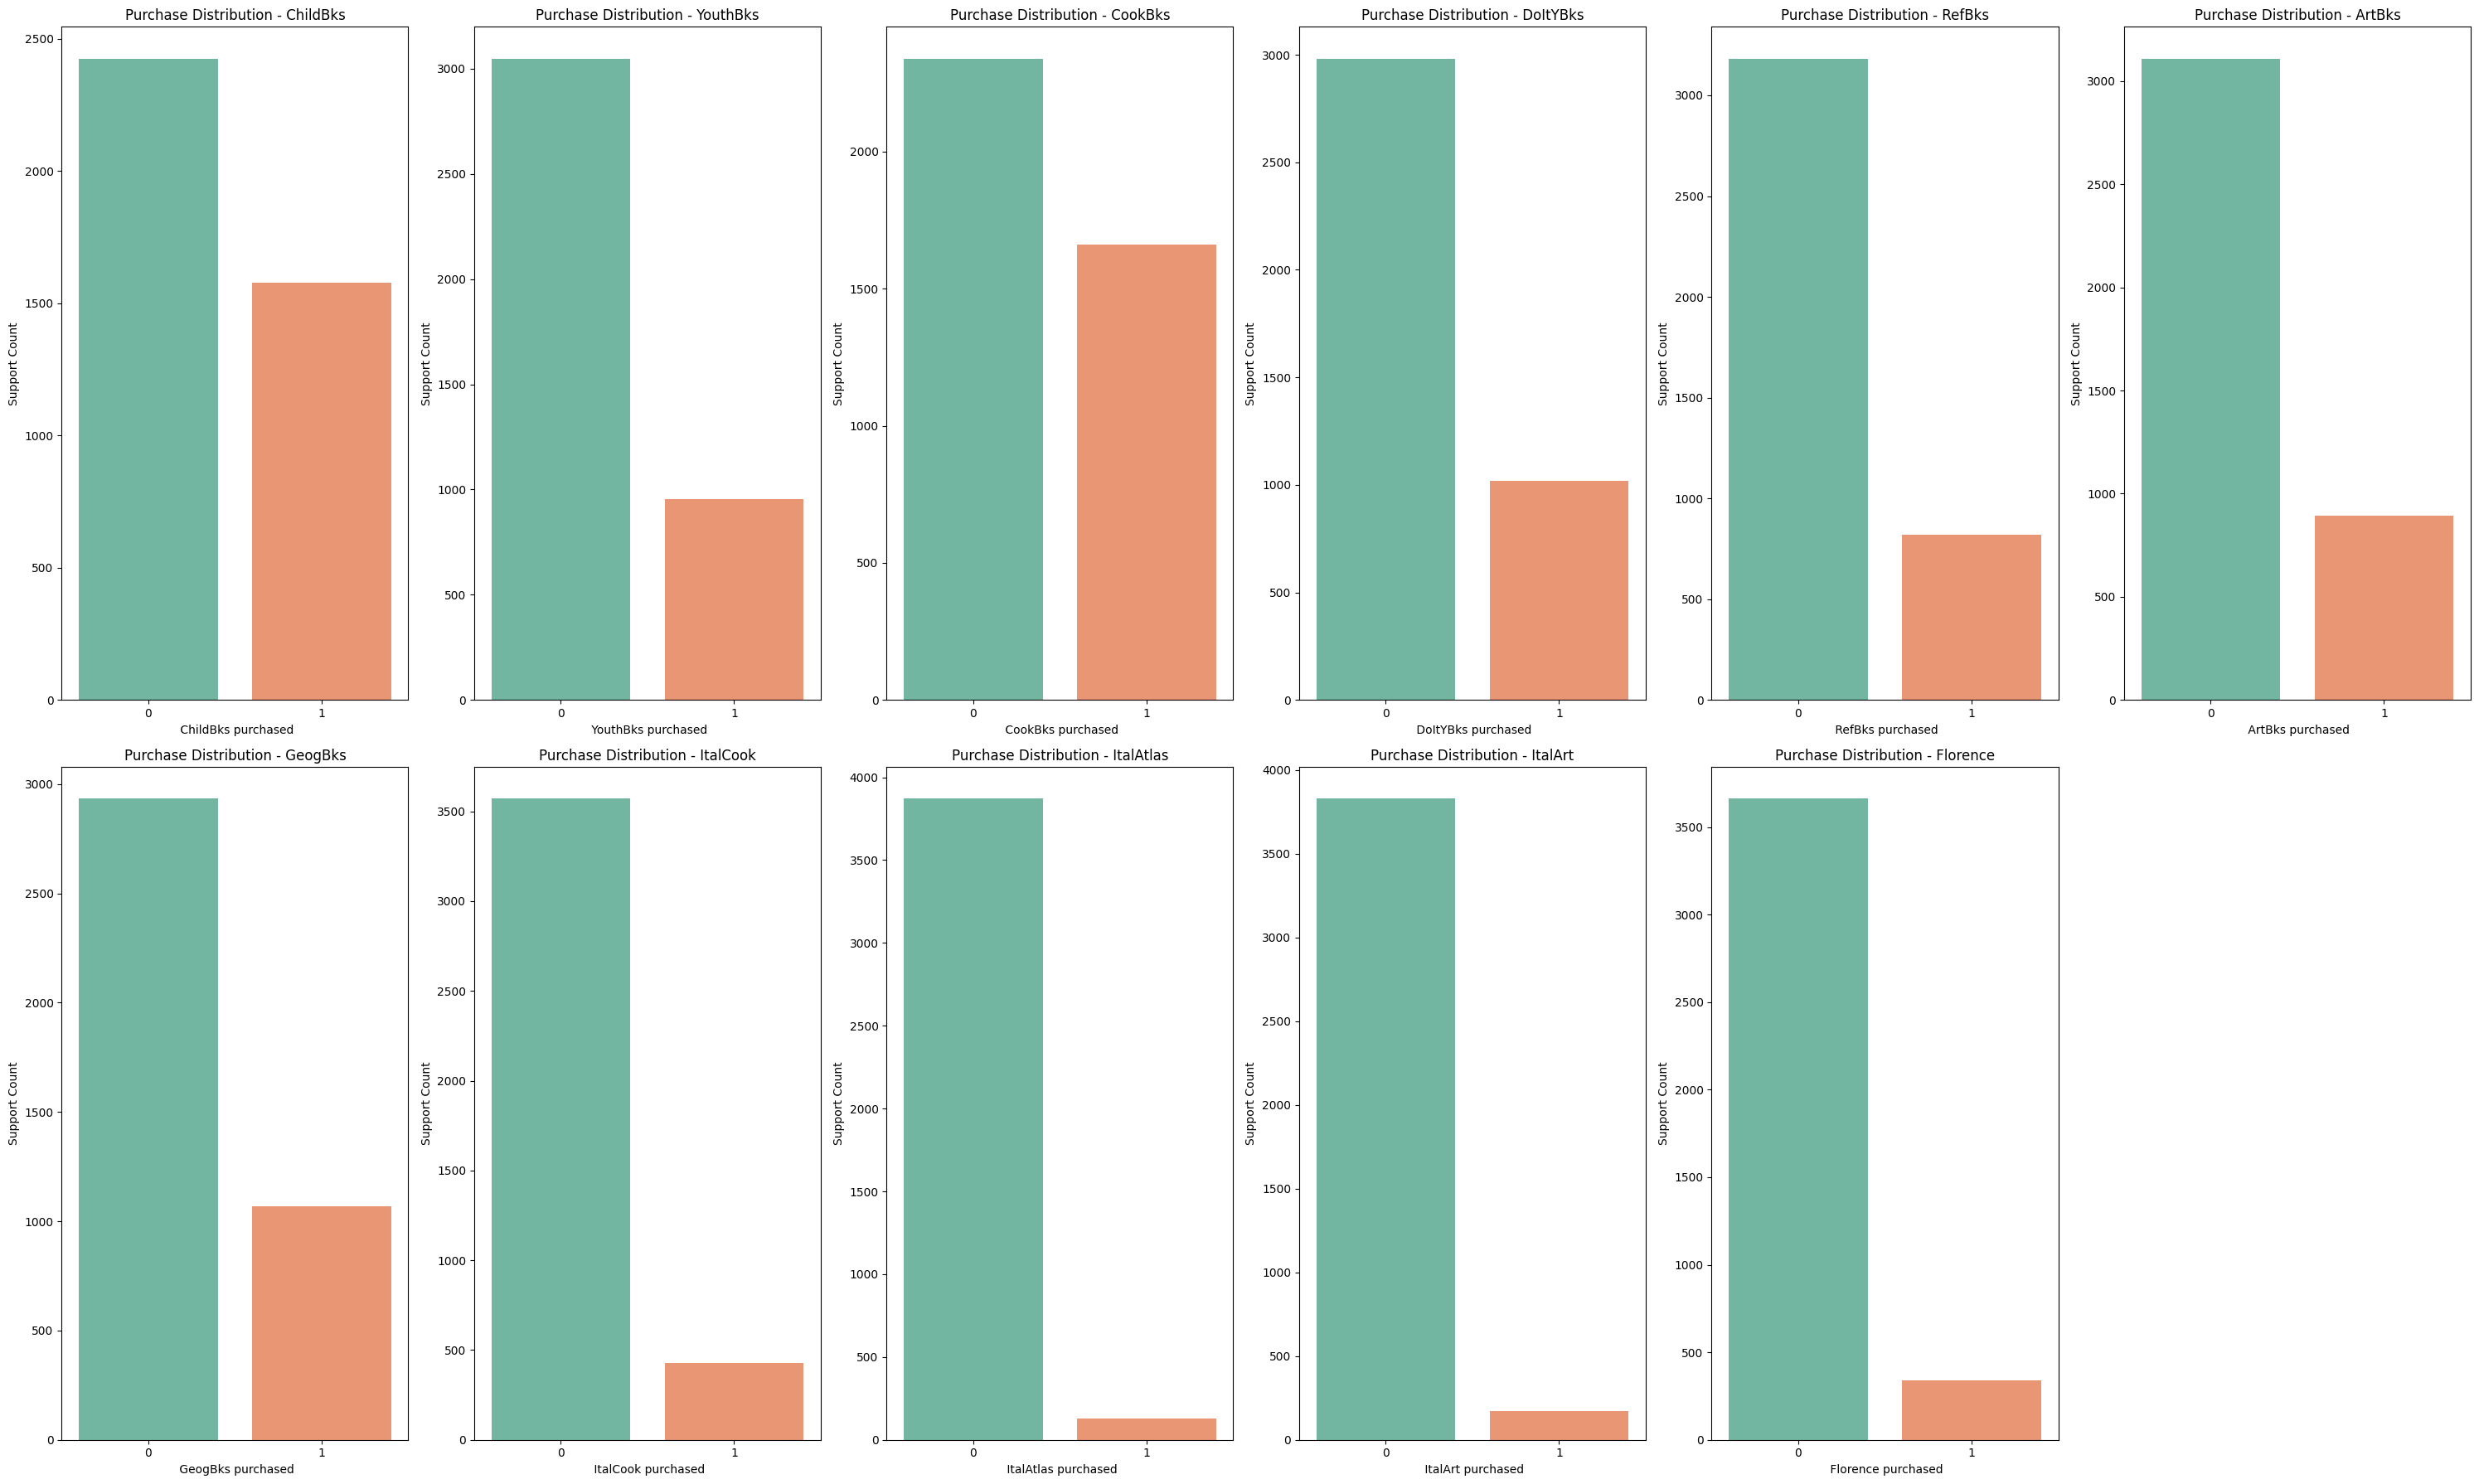

In [25]:
# Barplot
fig, ax = plt.subplots(2, 6, figsize=(30, 18))

axes = []
for i in range(2):
    for j in range(6):
        axes.append([i, j])

for i in range(len(data_drop.columns)):
    x, y = axes[i]
    counts = data_drop[data_drop.columns[i]].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=ax[x, y], palette='Set2')
    ax[x, y].set_title(f'Purchase Distribution - {data_drop.columns[i]}')
    ax[x, y].set_xlabel(f' {data_drop.columns[i]} purchased')
    ax[x, y].set_ylabel('Support Count')

fig.delaxes(ax[axes[-1][0], axes[-1][1]])
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


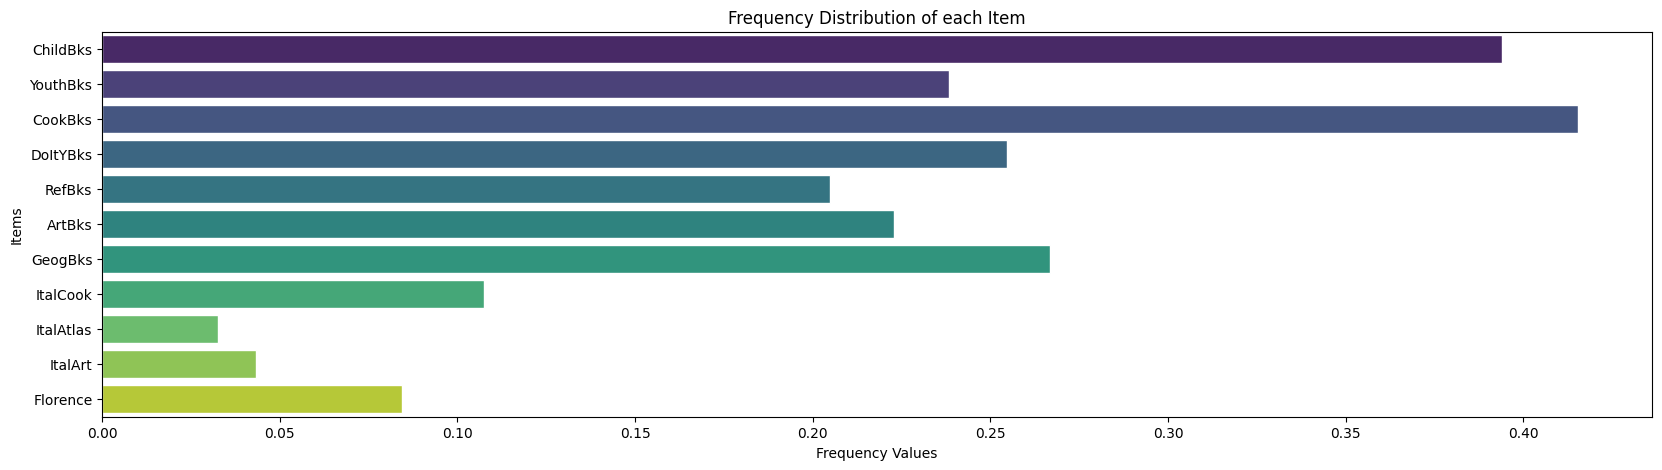

In [21]:
# Frequency Plot
data_frequency = data_drop.sum(axis=0) / len(data_drop)
data_frequency
fig, ax = plt.subplots(figsize=(20, 5))

cmap = sns.color_palette('viridis', n_colors=len(data_frequency))

sns.set_style('whitegrid')
sns.barplot(x=data_frequency.values, y=data_frequency.index, palette=cmap)

plt.title('Frequency Distribution of each Item')
plt.xlabel('Frequency Values')
plt.ylabel('Items')
plt.show()

#b) Find the frequent itemsets with the min_support =5%.

In [6]:
# Answer b)
min_sup = 0.05

data_freq_its = apriori(data_drop, min_support=min_sup, use_colnames=True)
data_freq_its

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.39400,(ChildBks)
1,0.23825,(YouthBks)
2,0.41550,(CookBks)
3,0.25475,(DoItYBks)
4,0.20475,(RefBks)
...,...,...
56,0.05525,"(ChildBks, CookBks, YouthBks, RefBks)"
57,0.06325,"(ChildBks, CookBks, YouthBks, GeogBks)"
58,0.06125,"(ChildBks, CookBks, DoItYBks, RefBks)"
59,0.06050,"(ChildBks, CookBks, DoItYBks, GeogBks)"


#d) Define min_confidence= 0.5 and print the 25 rules with the highest lift alonside their corresponding support, confidence, and lift. after finding the rules with min_confidence, sort them based on lift in descending order and print the top 25 with their corresponding support, confidence, and lift.

In [7]:
min_conf = 0.5
# Filter association rules based on minimum confidence
data_freq_itsets_rules = association_rules(data_freq_its, metric="lift")

# Filter rules based on minimum confidence and sort by lift in descending order
data_freq_itsets_rules_min_conf = data_freq_itsets_rules[data_freq_itsets_rules['confidence'] >= min_conf]
data_freq_itsets_rules_min_conf_25lift = data_freq_itsets_rules_min_conf.sort_values(by='lift', ascending=False).head(25)
data_freq_itsets_rules_min_conf_25lift

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
207,"(RefBks, YouthBks)","(ChildBks, CookBks)",0.08125,0.24200,0.05525,0.680000,2.809917,0.035588,2.368750,0.701080
235,"(RefBks, DoItYBks)","(ChildBks, CookBks)",0.09250,0.24200,0.06125,0.662162,2.736207,0.038865,2.243680,0.699207
193,"(YouthBks, DoItYBks)","(ChildBks, CookBks)",0.10325,0.24200,0.06700,0.648910,2.681448,0.042014,2.158993,0.699266
263,"(GeogBks, RefBks)","(ChildBks, CookBks)",0.08175,0.24200,0.05025,0.614679,2.539995,0.030467,1.967190,0.660276
221,"(GeogBks, YouthBks)","(ChildBks, CookBks)",0.10450,0.24200,0.06325,0.605263,2.501087,0.037961,1.920267,0.670211
249,"(GeogBks, DoItYBks)","(ChildBks, CookBks)",0.10100,0.24200,0.06050,0.599010,2.475248,0.036058,1.890321,0.662959
213,"(ChildBks, CookBks, GeogBks)",(YouthBks),0.10950,0.23825,0.06325,0.577626,2.424452,0.037162,1.803495,0.659782
227,"(ChildBks, CookBks, RefBks)",(DoItYBks),0.10350,0.25475,0.06125,0.591787,2.323013,0.034883,1.825642,0.635276
149,"(GeogBks, DoItYBks)",(YouthBks),0.10100,0.23825,0.05450,0.539604,2.264864,0.030437,1.654554,0.621215
199,"(ChildBks, CookBks, RefBks)",(YouthBks),0.10350,0.23825,0.05525,0.533816,2.240573,0.030591,1.634013,0.617608


In [8]:
print(data_freq_itsets_rules_min_conf_25lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                       antecedents          consequents  support  confidence  \
207             (RefBks, YouthBks)  (ChildBks, CookBks)  0.05525    0.680000   
235             (RefBks, DoItYBks)  (ChildBks, CookBks)  0.06125    0.662162   
193           (YouthBks, DoItYBks)  (ChildBks, CookBks)  0.06700    0.648910   
263              (GeogBks, RefBks)  (ChildBks, CookBks)  0.05025    0.614679   
221            (GeogBks, YouthBks)  (ChildBks, CookBks)  0.06325    0.605263   
249            (GeogBks, DoItYBks)  (ChildBks, CookBks)  0.06050    0.599010   
213   (ChildBks, CookBks, GeogBks)           (YouthBks)  0.06325    0.577626   
227    (ChildBks, CookBks, RefBks)           (DoItYBks)  0.06125    0.591787   
149            (GeogBks, DoItYBks)           (YouthBks)  0.05450    0.539604   
199    (ChildBks, CookBks, RefBks)           (YouthBks)  0.05525    0.533816   
185  (ChildBks, CookBks, DoItYBks)           (YouthBks)  0.06700    0.524462   
184  (ChildBks, CookBks, YouthBks)      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#e) Filter rules by number of antecedents (maximum 2) and consequents (maximum 1) and print the rules with their support, confidence, and lift.

In [9]:
# Filter after min_support and min_confidence
data_freq_itsets_rules_filter =  data_freq_itsets_rules_min_conf[(data_freq_itsets_rules_min_conf['antecedents'].str.len() <= 2) & (data_freq_itsets_rules_min_conf['consequents'].str.len() <= 1)]
print(data_freq_itsets_rules_filter.shape)
data_freq_itsets_rules_filter

(53, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(YouthBks),(ChildBks),0.23825,0.39400,0.14750,0.619098,1.571314,0.053629,1.590959,0.477309
2,(ChildBks),(CookBks),0.39400,0.41550,0.24200,0.614213,1.478251,0.078293,1.515086,0.533869
3,(CookBks),(ChildBks),0.41550,0.39400,0.24200,0.582431,1.478251,0.078293,1.451256,0.553507
5,(DoItYBks),(ChildBks),0.25475,0.39400,0.16150,0.633955,1.609022,0.061129,1.655534,0.507889
7,(RefBks),(ChildBks),0.20475,0.39400,0.12825,0.626374,1.589781,0.047579,1.621941,0.466498
11,(GeogBks),(ChildBks),0.26675,0.39400,0.14625,0.548266,1.391538,0.041150,1.341498,0.383731
13,(ItalCook),(ChildBks),0.10750,0.39400,0.06025,0.560465,1.422500,0.017895,1.378730,0.332787
15,(YouthBks),(CookBks),0.23825,0.41550,0.16100,0.675761,1.626380,0.062007,1.802681,0.505596
25,(DoItYBks),(CookBks),0.25475,0.41550,0.16875,0.662414,1.594258,0.062901,1.731411,0.500166
27,(RefBks),(CookBks),0.20475,0.41550,0.13975,0.682540,1.642695,0.054676,1.841175,0.491976


In [10]:
print(data_freq_itsets_rules_filter[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

              antecedents consequents  support  confidence      lift
1              (YouthBks)  (ChildBks)  0.14750    0.619098  1.571314
2              (ChildBks)   (CookBks)  0.24200    0.614213  1.478251
3               (CookBks)  (ChildBks)  0.24200    0.582431  1.478251
5              (DoItYBks)  (ChildBks)  0.16150    0.633955  1.609022
7                (RefBks)  (ChildBks)  0.12825    0.626374  1.589781
11              (GeogBks)  (ChildBks)  0.14625    0.548266  1.391538
13             (ItalCook)  (ChildBks)  0.06025    0.560465  1.422500
15             (YouthBks)   (CookBks)  0.16100    0.675761  1.626380
25             (DoItYBks)   (CookBks)  0.16875    0.662414  1.594258
27               (RefBks)   (CookBks)  0.13975    0.682540  1.642695
29               (ArtBks)   (CookBks)  0.11300    0.506726  1.219558
30              (GeogBks)   (CookBks)  0.15625    0.585754  1.409758
33             (ItalCook)   (CookBks)  0.06875    0.639535  1.539193
47   (ChildBks, YouthBks)   (CookB

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
